In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('clustered_data_v2.csv')

print(df.isnull().sum())

print(df.describe())



# %%
print(df.dtypes)


# %%
# Kategorik alanları seçme
categorical_columns = ['bathroom_category', 'bedrooms_cat', 'is_near_shore', ]

# Tek sıcaklık kodlama (One-Hot Encoding) işlemi
df = pd.get_dummies(df, columns=categorical_columns)

# Sonuçları kontrol etme
print(df.head())

# Güncellenmiş veri tiplerini görme
print(df.dtypes)


# %%
df.columns

# %%
# Silinecek sütunların listesi
columns_to_drop_cat = [
    'lot_size_category', 'grade_living_category', 
    'bathroom_category_+3 Bathrooms', 'bathroom_category_1-2 Bathrooms',
    'bathroom_category_2-3 Bathrooms', 'bathroom_category_Studio or 1 Bathroom', 
    'bedrooms_cat_3-4', 'bedrooms_cat_<3', 'bedrooms_cat_>4','sqft_lot','grade_living','cluster_no_outlier','waterfront'
]

columns_to_drop_main = [
'bedrooms', 'bathrooms','sqft_lot','grade_living','grade_living_category','waterfront'
]
df_wo_cat= df.drop(columns=columns_to_drop_cat)
df_wo_main= df.drop(columns=columns_to_drop_main)



C:\Users\jos_m\AppData\Local\Temp\ipykernel_8620\1349232744.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


price                          0
bedrooms                       0
bathrooms                      0
sqft_lot_normalized            0
floors                         0
waterfront                     0
view                           0
condition                      0
yr_built                       0
yr_renovated                   0
zipcode                        0
lat                            0
long                           0
nearest_station_distance_km    0
bathroom_category              0
density                        0
commute_time                   0
distance_to_point_km           0
is_near_shore                  0
grade_living_normalized        0
bedrooms_cat                   0
lot_size_category              0
grade_living_category          0
outliers_ecod                  0
cluster_all_data               0
cluster_no_outlier             0
sqft_lot                       0
grade_living                   0
dtype: int64
              price      bedrooms     bathrooms  sqft_lot_norma

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1861
[LightGBM] [Info] Number of data points in the train set: 1683, number of used features: 17
[LightGBM] [Info] Start training from score 929705.190731
Results for dataset without categorical columns:
Linear Regression - MSE: 212479504952.47025, R2: 0.6565446620525981
Ridge Regression - MSE: 212471113811.29245, R2: 0.656558225630081
Lasso Regression - MSE: 212479537865.672, R2: 0.6565446088511618
Decision Tree - MSE: 153638039748.61044, R2: 0.7516569662789874
Random Forest - MSE: 90315690459.55965, R2: 0.8540122446365839
Gradient Boosting - MSE: 97519789917.23546, R2: 0.8423674207539406
XGBoost - MSE: 103659600966.9486, R2: 0.832442930015485
LightGBM - MSE: 117063582391.48196, R2: 0.8107765157839872
CatBoost - MSE: 108464800382.16063, R2: 0.8246757272943308


c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.822e+11, tolerance: 6.618e+10
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1855
[LightGBM] [Info] Number of data points in the train set: 1683, number of used features: 23
[LightGBM] [Info] Start training from score 929705.190731

Results for dataset without main columns:
Linear Regression - MSE: 217601072389.81784, R2: 0.6482660768996059
Ridge Regression - MSE: 217621297679.47958, R2: 0.6482333844114649
Lasso Regression - MSE: 217600933045.67645, R2: 0.6482663021377493
Decision Tree - MSE: 164341321436.8266, R2: 0.7343560071573307
Random Forest - MSE: 89019156904.84145, R2: 0.8561079826245629
Gradient Boosting - MSE: 93825908034.30037, R2: 0.8483382716871872
XGBoost - MSE: 92623665037.51625, R2: 0.8502815968791758
LightGBM - MSE: 116385626550.28047, R2: 0.8118723746650842
CatBoost - MSE: 101424170893.8014, R2: 0.8360563156519127


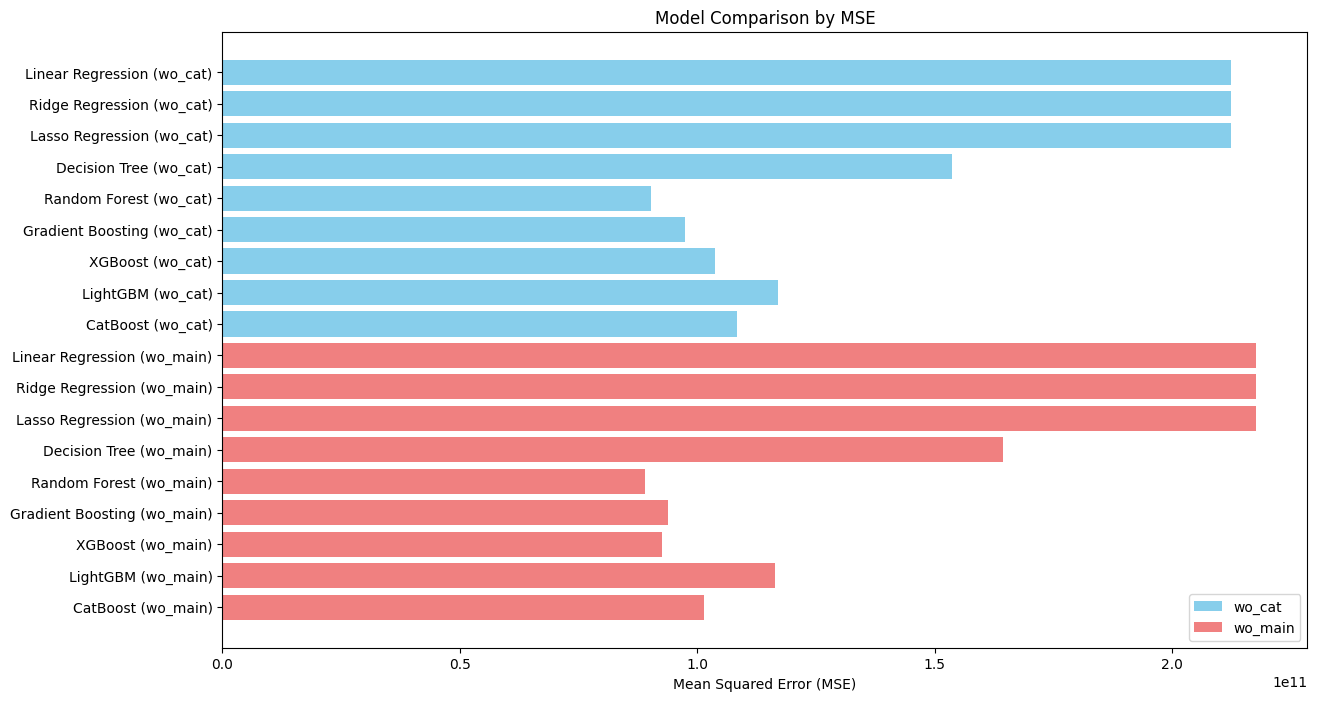

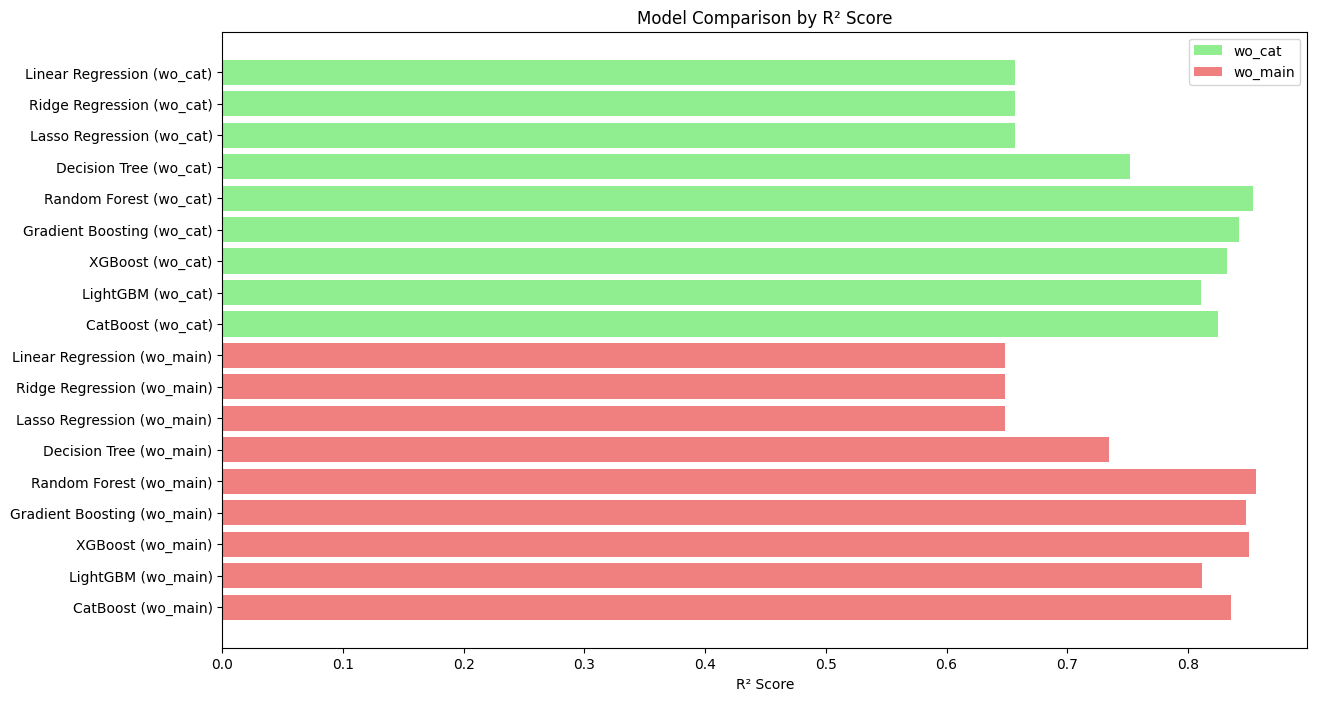

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Kategorik ve main sütunlar olmadan verisetleri oluşturma
X_wo_cat = df_wo_cat[df_wo_cat['cluster_all_data'] == 2].drop('price', axis=1)
y_wo_cat = df_wo_cat[df_wo_cat['cluster_all_data'] == 2]['price']

X_wo_main = df_wo_main[df_wo_main['cluster_all_data'] == 2].drop('price', axis=1)
y_wo_main = df_wo_main[df_wo_main['cluster_all_data'] == 2]['price']

# Eğitim ve test setlerine ayırma
X_train_wo_cat, X_test_wo_cat, y_train_wo_cat, y_test_wo_cat = train_test_split(X_wo_cat, y_wo_cat, test_size=0.2, random_state=42)
X_train_wo_main, X_test_wo_main, y_train_wo_main, y_test_wo_main = train_test_split(X_wo_main, y_wo_main, test_size=0.2, random_state=42)

# Ölçekleyici oluşturma ve eğitim setini ölçekleme
scaler_wo_cat = StandardScaler()
scaler_wo_main = StandardScaler()

X_train_wo_cat = scaler_wo_cat.fit_transform(X_train_wo_cat)
X_test_wo_cat = scaler_wo_cat.transform(X_test_wo_cat)

X_train_wo_main = scaler_wo_main.fit_transform(X_train_wo_main)
X_test_wo_main = scaler_wo_main.transform(X_test_wo_main)

# Modelleri oluşturma
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

# Performans değerlendirme fonksiyonu
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2": r2}
    return results

# Modelleri değerlendirme (df_wo_cat için)
results_wo_cat = evaluate_models(models, X_train_wo_cat, y_train_wo_cat, X_test_wo_cat, y_test_wo_cat)
print("Results for dataset without categorical columns:")
for model, metrics in results_wo_cat.items():
    print(f"{model} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

# Modelleri değerlendirme (df_wo_main için)
results_wo_main = evaluate_models(models, X_train_wo_main, y_train_wo_main, X_test_wo_main, y_test_wo_main)
print("\nResults for dataset without main columns:")
for model, metrics in results_wo_main.items():
    print(f"{model} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

# Grafikleri çizmek için verileri hazırlama
model_names = list(models.keys())

mse_scores_wo_cat = [results_wo_cat[model]['MSE'] for model in model_names]
r2_scores_wo_cat = [results_wo_cat[model]['R2'] for model in model_names]

mse_scores_wo_main = [results_wo_main[model]['MSE'] for model in model_names]
r2_scores_wo_main = [results_wo_main[model]['R2'] for model in model_names]

# MSE skorları için grafik
plt.figure(figsize=(14, 8))
plt.barh([f"{model} (wo_cat)" for model in model_names], mse_scores_wo_cat, color='skyblue', label='wo_cat')
plt.barh([f"{model} (wo_main)" for model in model_names], mse_scores_wo_main, color='lightcoral', label='wo_main')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Comparison by MSE')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the first model on top
plt.show()

# R² skorları için grafik
plt.figure(figsize=(14, 8))
plt.barh([f"{model} (wo_cat)" for model in model_names], r2_scores_wo_cat, color='lightgreen', label='wo_cat')
plt.barh([f"{model} (wo_main)" for model in model_names], r2_scores_wo_main, color='lightcoral', label='wo_main')
plt.xlabel('R² Score')
plt.title('Model Comparison by R² Score')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the first model on top
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Örnek bir parametre grid'i
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,20,50],
    'min_samples_split': [10,20,50],
    'min_samples_leaf': [0.1,0.5,1]
}

# Random Forest Regressor modeli
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV için cross-validation stratejisi belirleyin
cv = 5  # 5-fold cross-validation örneği

# GridSearchCV'yi tanımlayın
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=cv, scoring={'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}, verbose=2, n_jobs=-1, refit='r2')

# GridSearchCV'yi eğitin
grid_search_rf.fit(X_train_wo_cat, y_train_wo_cat)

# En iyi parametre setini ve en iyi performansı görüntüleyin
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best R² score found: ", grid_search_rf.best_score_)
print("Best negative MSE found: ", grid_search_rf.cv_results_['mean_test_neg_mean_squared_error'][grid_search_rf.best_index_])


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best R² score found:  0.8029369446811143
Best negative MSE found:  -77372787536.92487


In [9]:
# XGBoost için parametre grid'i
xgb_param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.4,0.6, 0.8, 1],
    'gamma': [0, 0.1]
}

# XGBoost Regressor modeli
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV'yi tanımlayın
grid_search_xgb = GridSearchCV(xgb_model, xgb_param_grid, cv=cv, scoring={'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}, verbose=2, n_jobs=-1, refit='r2')

# GridSearchCV'yi eğitin
grid_search_xgb.fit(X_train_wo_cat, y_train_wo_cat)

# En iyi parametre setini ve en iyi performansı görüntüleyin
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best R² score found for XGBoost: ", grid_search_xgb.best_score_)
print("Best negative MSE found for XGBoost: ", grid_search_xgb.cv_results_['mean_test_neg_mean_squared_error'][grid_search_xgb.best_index_])

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found for XGBoost:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}
Best R² score found for XGBoost:  0.8395987890185648
Best negative MSE found for XGBoost:  -62145960792.68561


In [ ]:
important_features = ['feature1', 'feature2', 'feature3']  # Önemli özellikler
X_important = df[important_features]
y = df['price']